In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:red">STEP 1 : Understand DATA</h2>

In [2]:
df = pd.read_excel("SecondToLast.xlsx")
df.head(6)

,Brand,Price,Year,Kilometrage,Energie,Boite
0,Mercedes-Benz GLA,138500,2012,105000,Essence,Manuelle
1,Mercedes-Benz Classe E,227000,2015,320000,Essence,Automatique
2,BMW Série 5,260000,2016,78000,Essence,Manuelle
3,BMW Série 3,126000,2017,7000,Essence,Manuelle
4,BMW Série 5,117500,2012,4400,Essence,Manuelle
5,Porsche Cayenne,N.C,2015,83500,Essence,Manuelle


In [3]:
print("The shape of dataset is {}".format(df.shape))

The shape of dataset is (2604, 6)


In [4]:
df1 = df.drop_duplicates()

In [5]:
print("The shape of dataset is {}".format(df1.shape))

The shape of dataset is (2583, 6)


In [6]:
df1.isnull().sum()

Brand          0
Price          0
Year           0
Kilometrage    0
Energie        0
Boite          1
dtype: int64

In [7]:
df1.dropna(axis ="rows" , inplace = True)
df1.shape

C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(2582, 6)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2582 entries, 0 to 2602
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        2582 non-null   object
 1   Price        2582 non-null   object
 2   Year         2582 non-null   int64 
 3   Kilometrage  2582 non-null   int64 
 4   Energie      2582 non-null   object
 5   Boite        2582 non-null   object
dtypes: int64(2), object(4)
memory usage: 141.2+ KB


In [9]:
## Price : Type Object must change to float type 


In [10]:
drop_condition = df1[df1.Price == "N.C"].index

In [11]:
df2 = df1.drop(drop_condition , axis = "rows")

In [12]:
print ("Shape of d2 is {}".format(df2.shape))

Shape of d2 is (2383, 6)


In [13]:
df2.Price = pd.to_numeric(df2.Price)

<h2 style="color:red">STEP 2 : Exploratory Data Analysis</h2>

In [14]:
df2.head()

,Brand,Price,Year,Kilometrage,Energie,Boite
0,Mercedes-Benz GLA,138500,2012,105000,Essence,Manuelle
1,Mercedes-Benz Classe E,227000,2015,320000,Essence,Automatique
2,BMW Série 5,260000,2016,78000,Essence,Manuelle
3,BMW Série 3,126000,2017,7000,Essence,Manuelle
4,BMW Série 5,117500,2012,4400,Essence,Manuelle


In [15]:
def count_plot(feature1,feature2,feature3,data):
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1)
    sns.countplot(x = feature1 , data = data)
    plt.subplot(3,1,2)
    sns.countplot(x = feature2 , data =data )
    plt.subplot(3,1,3)
    sns.countplot(x = feature3 , data =data )

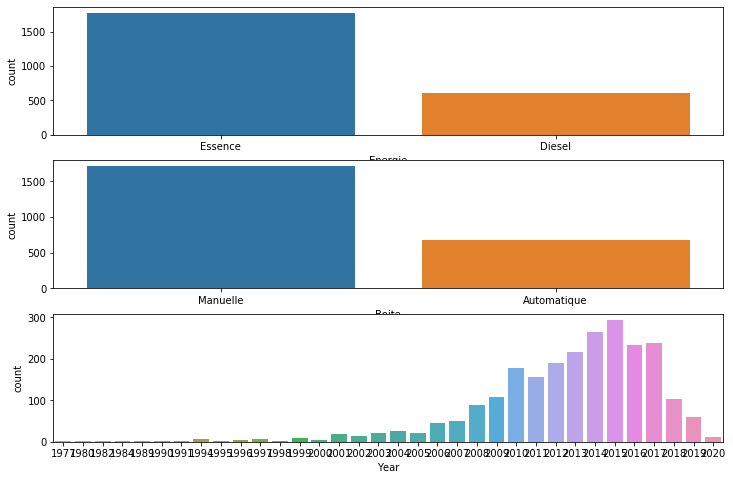

In [16]:
count_plot("Energie","Boite","Year", df2)

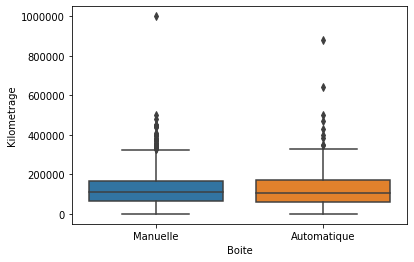

In [17]:
sns.boxplot(x = "Boite" , y ="Kilometrage" , data = df2)

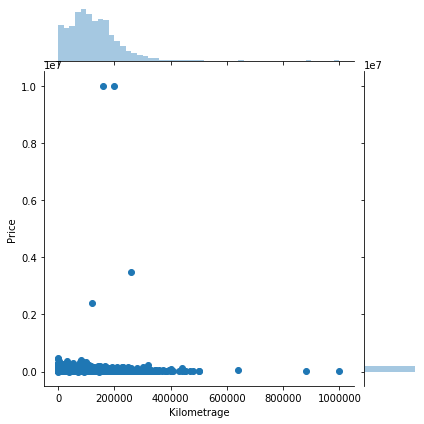

In [18]:
sns.jointplot(x ="Kilometrage", y ="Price" , data = df2)

<h2 style="color:red">STEP 3 : Feature Engineering</h2>


In [19]:
# DELETE :
# df2 Where Kilom > 600.000 km
# df2 Where 20.000 < Price < 200.000
# df2 Where Brand.value_counts()<2

In [20]:
df3 = df2[(df2['Price'] > 20000) & (df2['Price'] < 200000)]

In [21]:
df4 = df3[(df3['Kilometrage'] < 600000)]


In [22]:
df4.Price.min()

20400

In [23]:
drop_brand_contrainte = df4.Brand.value_counts() 
drop_brand_contrainte_under_2 = drop_brand_contrainte[drop_brand_contrainte < 2 ]
drop_brand_contrainte_under_2

Peugeot 206             1
Infiniti Q45            1
Mercedes-Benz CL        1
Peugeot 308 cc          1
Honda City              1
                       ..
Chevrolet Venture       1
Opel Vivaro             1
Ford Escort             1
Skoda Rapid             1
Renault Clio Classic    1
Name: Brand, Length: 107, dtype: int64

In [24]:
df4.Brand = df4.Brand.apply(lambda x : "other" if x in drop_brand_contrainte_under_2 else x )

C:\Users\KOUSSAY\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


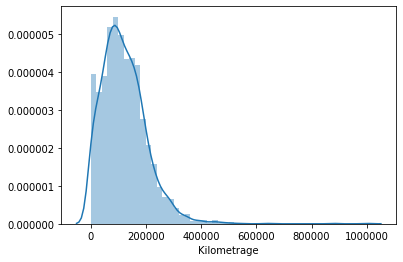

In [25]:
sns.distplot(df.Kilometrage)

In [26]:
df4.head()

,Brand,Price,Year,Kilometrage,Energie,Boite
0,Mercedes-Benz GLA,138500,2012,105000,Essence,Manuelle
3,BMW Série 3,126000,2017,7000,Essence,Manuelle
4,BMW Série 5,117500,2012,4400,Essence,Manuelle
6,Land Rover Range Rover Sport,175000,2014,100000,Diesel,Automatique
7,Porsche Cayenne,175000,2016,47000,Essence,Automatique


In [27]:
dict0 = {"Essence" : 1 , "Diesel" : 0 }
dict1 = {"Manuelle" : 1 , "Automatique" : 0}
df4['Energie'] = pd.to_numeric(df4['Energie'].map(dict0))


C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df4['Boite'] = pd.to_numeric(df4['Boite'].map(dict1))

C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
dummies = pd.get_dummies(df4['Brand'] )
dummies.head()

,Alfa Romeo 147,Alfa Romeo Giulietta,Alfa Romeo Mito,Audi A1,Audi A3,Audi A3 Berline,Audi A3 Sportback,Audi A4,Audi A5 Coupé,Audi A5 Sportback,...,Volkswagen Scirocco,Volkswagen Tiguan,Volkswagen Touareg,Volkswagen Touran,Volkswagen Transporter,Volvo C30,Volvo S60,Volvo S80,Wallyscar Izis,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df5 = pd.concat([df4 ,dummies.drop("other" , axis= "columns")] , axis = "columns")

In [31]:
df5.head()

,Brand,Price,Year,Kilometrage,Energie,Boite,Alfa Romeo 147,Alfa Romeo Giulietta,Alfa Romeo Mito,Audi A1,...,Volkswagen Polo Sedan,Volkswagen Scirocco,Volkswagen Tiguan,Volkswagen Touareg,Volkswagen Touran,Volkswagen Transporter,Volvo C30,Volvo S60,Volvo S80,Wallyscar Izis
0,Mercedes-Benz GLA,138500,2012,105000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BMW Série 3,126000,2017,7000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BMW Série 5,117500,2012,4400,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Land Rover Range Rover Sport,175000,2014,100000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Porsche Cayenne,175000,2016,47000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style="color:red">STEP 4 : Prediction</h2>


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 


In [33]:
X = df5.drop(["Brand" , "Price" ], axis = "columns") 
y = df5.Price

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

In [35]:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Training accuracy (the coefficient of determination): {:.3f}'.format(lm.score(X_train, y_train)))

Training accuracy (the coefficient of determination): 0.708


In [36]:
print('Testing accuracy by using score function: {:.3f}'.format(lm.score(X_test, y_test)))


Testing accuracy by using score function: 0.599


In [37]:
y_pred = lm.predict(X_test)
mean_squared_error(y_test,y_pred)

447837934.29511696

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf = RandomForestRegressor()

In [40]:
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
rf.score(X_test,y_test)

0.5428093934669971

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

cv = ShuffleSplit(n_splits= 5 , test_size = 0.2 , random_state = 3 ) 
cross_val_score(LinearRegression() , X , y , cv = cv ) 

array([ 6.64121053e-01,  6.64945431e-01,  6.44972460e-01, -2.23992541e+09,
        5.37835888e-01])

In [43]:
def find_vest_model_using_gridsearchcv(X,y):
    
    algos = {
        
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True , False]
                        }
                              },
        
        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
                      }
                   },
        
        
        'decesion_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
            'criterion':['mse','friedman_mse'],
            'splitter' : ['best', 'random']       
                       }   
                          }
            }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=3)
    
    for algo_name, config in algos.items():
            
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_Score': gs.best_score_,
            'Best_Parms': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['Model','Best_Score','Best_Parms']) 
    

    

In [44]:
find_vest_model_using_gridsearchcv(X,y)

,Model,Best_Score,Best_Parms
0,linear_regression,-4.479851e+08,{'normalize': False}
1,lasso,6.120606e-01,"{'alpha': 2, 'selection': 'cyclic'}"
2,decesion_tree,3.172498e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [45]:
def predict(brand , year , kilometrage , energie , boite):
    loc_index = np.where(X.columns == brand)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = kilometrage
    x[2] = energie
    x[3] = boite
    x[loc_index] = 1
    
    if lm.predict([x])[0] > 0 :
        return  lm.predict([x])[0]
    else:
        print ('Value Impossible')

In [46]:
predict("Volkswagen Golf 7" , 2014 , 60000 , 1 , 1)

63187.861652016174

In [47]:
predict("Volkswagen Golf 7" , 2014 , 140000 , 1 , 1)

56108.122031921055

In [48]:
predict("BMW Série 3" , 2008 , 250000 , 1 , 0)

55269.881445866544

In [49]:
predict("Volkswagen Passat" , 2013 , 170000 , 0 , 1)

44272.163210425526

In [50]:
predict("Volkswagen Passat" , 2006 , 57000 , 1 , 0)

46577.07127443049